# Binary Star System Simulation

This code simulates the motion of two stars in a binary star system using the Runge-Kutta method (RK45) with SciPy's solve_ivp function. The simulation is based on the laws of gravitational attraction between the two stars. 

## Laws of Gravitational Attraction

The motion of the stars is governed by Newton's laws of motion and the law of universal gravitation. According to the law of universal gravitation, the gravitational force between two objects is given by:

$$F = G \frac{m_1m_2}{r^2}$$

where $F$ is the force between the two objects, $m_1$ and $m_2$ are the masses of the two objects, $r$ is the distance between the two objects, and $G$ is the gravitational constant.

The acceleration of an object due to the gravitational force can be found using Newton's second law of motion:

$$F = ma$$

where $a$ is the acceleration of the object and $m$ is its mass. Combining these two equations, we get:

$$a = G \frac{m_1}{r^2}$$

which represents the acceleration of an object due to the gravitational force of another object of mass $m_1$ at a distance $r$.

In [7]:
# Enable interactive plot
%matplotlib notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

In [3]:
# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M1 = 1.989e30    # Mass of the first object (kg)
M2 = 5.972e24    # Mass of the second object (kg)

## Equations of Motion

For a binary star system, the motion of each star is determined by the gravitational force of the other star. Therefore, the equations of motion for the system can be written as a set of coupled second-order ordinary differential equations:

$\frac{d^2x_1}{dt^2} = G \frac{m_2(x_2 - x_1)}{r^3}$

$\frac{d^2y_1}{dt^2} = G \frac{m_2(y_2 - y_1)}{r^3}$

$\frac{d^2x_2}{dt^2} = G \frac{m_1(x_1 - x_2)}{r^3}$

$\frac{d^2y_2}{dt^2} = G \frac{m_1(y_1 - y_2)}{r^3}$

where $x_1$, $y_1$ and $x_2$, $y_2$ are the positions of the two stars in the x and y directions respectively, and $r$ is the distance between the two stars given by:

$r = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

In [4]:
def equations_of_motion(t, y):
    r = np.sqrt((y[0] - y[4])**2 + (y[2] - y[6])**2)
    dy_dt = [
        y[1],
        -G * M2 * (y[0] - y[4]) / r**3,
        y[3],
        -G * M2 * (y[2] - y[6]) / r**3,
        y[5],
        G * M1 * (y[0] - y[4]) / r**3,
        y[7],
        G * M1 * (y[2] - y[6]) / r**3
    ]
    return dy_dt

### Introduction to Runge Kutta 5th order method for solving Ordinary Differential Equations

The Runge-Kutta (RK) method is a widely used numerical method for solving Ordinary Differential Equations (ODEs). It is a class of explicit and implicit numerical algorithms that approximate the solution of an ODE at a given time step.

The RK method works by recursively estimating the slope of the solution at different intermediate points between the initial and final time points. The RK method of order 5 (RK5) is a popular method that provides high accuracy and stability for solving stiff ODEs.

The RK5 method approximates the solution of an ODE $y'(t) = f(t,y(t))$ at a discrete set of time points $t_0, t_1, t_2, ..., t_n$. The solution $y(t)$ is estimated at each time point using the following formula:

$$
\begin{aligned}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + \frac{h}{4}, y_n + \frac{h}{4}k_1) \\
k_3 &= f(t_n + \frac{3h}{8}, y_n + \frac{3h}{32}k_1 + \frac{9h}{32}k_2) \\
k_4 &= f(t_n + \frac{12h}{13}, y_n + \frac{1932}{2197}hk_1 - \frac{7200}{2197}hk_2 + \frac{7296}{2197}hk_3) \\
k_5 &= f(t_n + h, y_n + \frac{439}{216}hk_1 - 8hk_2 + \frac{3680}{513}hk_3 - \frac{845}{4104}hk_4) \\
k_6 &= f(t_n + \frac{h}{2}, y_n - \frac{8}{27}hk_1 + 2hk_2 - \frac{3544}{2565}hk_3 + \frac{1859}{4104}hk_4 - \frac{11}{40}hk_5) \\
y_{n+1} &= y_n + h(\frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6)
\end{aligned}
$$

where $y_n$ is the solution estimate at the $n$-th time point, $h$ is the time step size, and $k_1, k_2, k_3, k_4, k_5$, and $k_6$ are intermediate slope estimates.

The RK5 method has a local error of order 6 and a global error of order 5, meaning that the error in each time step is proportional to $h^6$, but the error over the entire interval is proportional to $h^5$.

In the `solve_system` function, we use the RK45 method of the `solve_ivp` function to solve the system of equations of motion defined in the `equations_of_motion` function using the RK5 method with adaptive step size control. The `initial_conditions` and `t_eval` arguments are the initial conditions and time points at which to evaluate the solution, respectively. 


In [5]:
def solve_system(t_span, initial_conditions, t_eval):
    solution = solve_ivp(equations_of_motion, t_span, initial_conditions, 
                         method='RK45', t_eval=t_eval)
    return solution

### Simulation

The simulation uses the solve_ivp function from the SciPy library to solve the system of coupled differential equations using the Runge-Kutta method of order 5(4) with adaptive step size control. The initial conditions for the simulation are set such that one star is at rest at the origin, while the other star is at a distance of 1.496e11 meters (the distance between the Sun and the Earth) and moving with a velocity of 29.29e3 meters per second (the average velocity of the Earth in its orbit around the Sun).

The animation shows the motion of the two stars in the binary system over a period of 10 million seconds. The red dot represents the more massive star, while the blue dot represents the less massive star. The animation provides a visual representation of the motion of the stars in the binary system and the effect of their gravitational attraction on each other.

### Initial conditions

In [ ]:
def initial_conditions():
    x1, vx1, y1, vy1 = 0, 0, 0, 0
    x2, vx2, y2, vy2 = 1.496e11, 0, 0, 29.29e3
    return [x1, vx1, y1, vy1, x2, vx2, y2, vy2]


def time_settings():
    t_span = (0, 1e7)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    return t_span, t_eval

### Representation

<IPython.core.display.Javascript object>


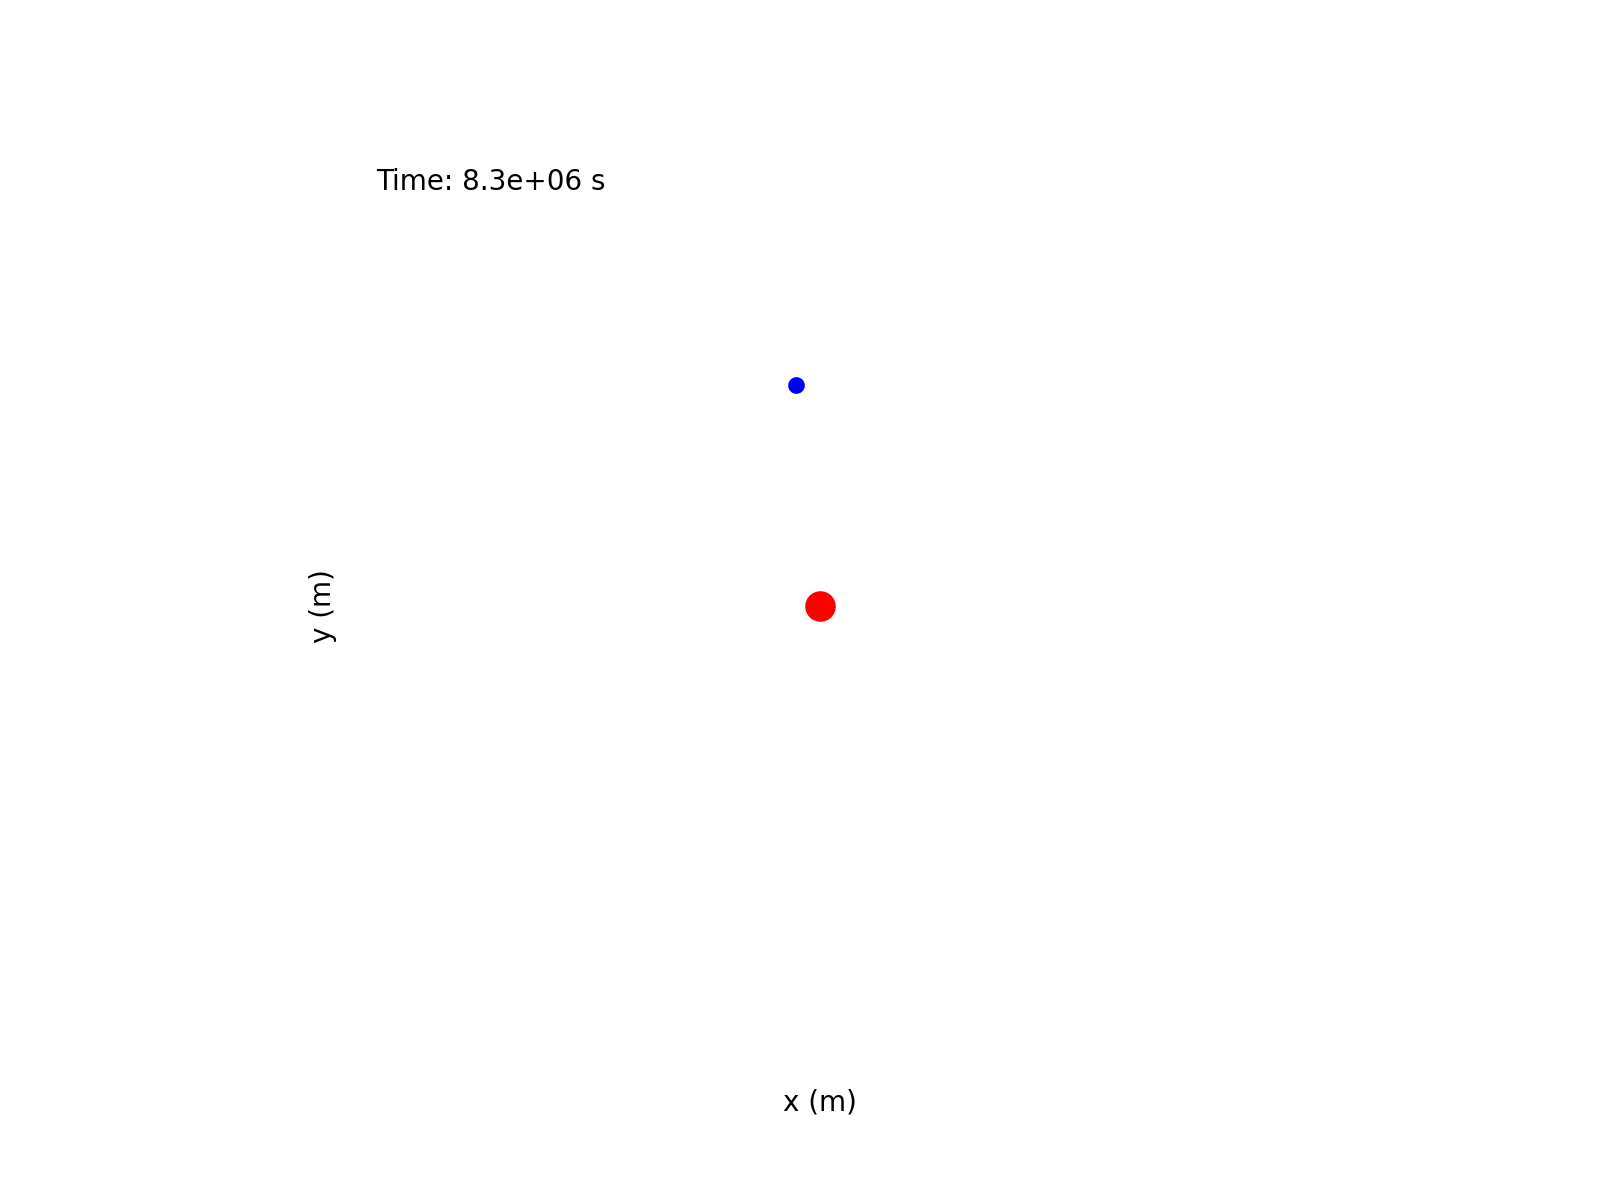

In [18]:
def setup_plot():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-3e11, 3e11)
    ax.set_ylim(-3e11, 3e11)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    return fig, ax


def init():
    object1.set_data([], [])
    object2.set_data([], [])
    time_label.set_text('')
    return object1, object2, time_label,


def update(frame):
    object1.set_data(solution.y[0, frame], solution.y[2, frame])
    object2.set_data(solution.y[4, frame], solution.y[6, frame])
    time_label.set_text(f'Time: {t_eval[frame]:.1e} s')
    return object1, object2, time_label,


# Set initial conditions and time settings
initial_conds = initial_conditions()
t_span, t_eval = time_settings()

# Solve the system
solution = solve_system(t_span, initial_conds, t_eval)

# Set up the plot
fig, ax = setup_plot()
# set the figure size
fig.set_figwidth(8)  # set the width to 8 inches
fig.set_figheight(6)  # set the height to 6 inches

object1, = ax.plot([], [], 'ro', markersize=10)
object2, = ax.plot([], [], 'bo', markersize=5)
time_label = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t_eval), interval=1, init_func=init, blit=True)

# Show the plot
plt.show()